# PacMan notebook

In [1]:
from random import randrange
from ale_py import ALEInterface, SDL_SUPPORT
from ale_py.roms import Pacman

system = ALEInterface()

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [2]:
system.loadROM(Pacman)

Game console created:
  ROM file:  /home/yvan/Documents/cnam/rcp211/project/venv/lib/python3.9/site-packages/ale_py/roms/pacman.bin
  Cart Name: Pac-Man (Atari) (PAL) [!]
  Cart MD5:  fc2233fc116faef0d3c31541717ca2db
  Display Format:  AUTO-DETECT ==> PAL
  ROM Size:        4096
  Bankswitch Type: AUTO-DETECT ==> 4K

Running ROM file...
Random seed is 1640194530


torch.Size([180, 160, 3])

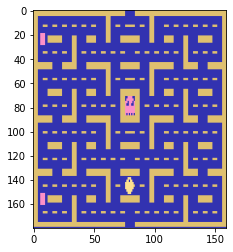

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = torch.from_numpy(system.getScreenRGB())
# img = torch.from_numpy(torch.FloatTensor(np.asarray(system.getScreenRGB().reshape(1, 1, 3, 250, 160))).numpy())

plt.imshow(img[20:-50,:,:])
img[20:-50,:,:].shape

In [4]:
old = img[20:-50,:,:]

In [5]:
legal_actions = system.getLegalActionSet()
action = legal_actions[0]

In [6]:
r_t = system.act(action)
r_t    

0

In [7]:
new = torch.from_numpy(system.getScreenRGB()[20:-50,:,:])

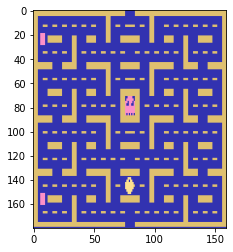

In [8]:
plt.imshow(new)

In [9]:
torch.stack([old, new]).shape

torch.Size([2, 180, 160, 3])

torch.Size([180, 160, 3])

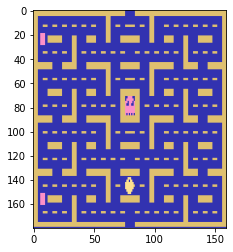

In [10]:
# help(torch.max)
img_merge = torch.max(torch.stack([old, new]), dim=0).values
plt.imshow(img_merge)
img_merge.shape

In [11]:
weights = torch.tensor([0.2126, 0.7152, 0.0722])

torch.Size([180, 160])

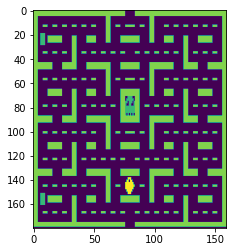

In [12]:
# .permute(2, 0, 1)
img_luminance = (img_merge * weights).sum(-1)
plt.imshow(img_luminance)
img_luminance.shape

In [13]:
from torchvision import transforms

p = transforms.Resize(size=84)
trans = transforms.ToPILImage()
trans1 = transforms.ToTensor()
trans1(p(trans(img_merge.permute(2, 0, 1)))).shape
# plt.imshow(trans1(p(trans(img_merge)).convert("RGB")).permute(1, 2, 0))

torch.Size([3, 94, 84])

In [35]:
import preprocessing
previous_state = torch.ones(250, 160, 3)

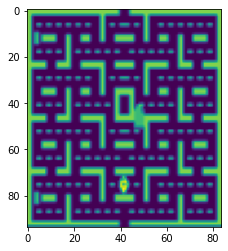

In [58]:
for i in range(200):
    state_t_plus_1 = torch.from_numpy(system.getScreenRGB())
    img = preprocessing.preprocessing(previous_state, state_t_plus_1)
    previous_state = state_t_plus_1
    system.act(system.getLegalActionSet()[0])
    if i % 20 == 0:
        plt.imshow(img)

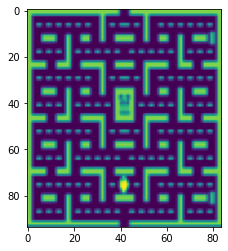